In [1]:
import os, sys
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import feature
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.measure import regionprops
#from skimage import data

In [2]:
T1_img = nib.load('./segmentation/T1.nii.gz')
lab_img = nib.load('./segmentation/labeled.nii.gz')
T1_ar = T1_img.get_fdata()
lab_ar = lab_img.get_fdata()

('mm', 'unknown') ('mm', 'sec')
0.0 591.6317749023438


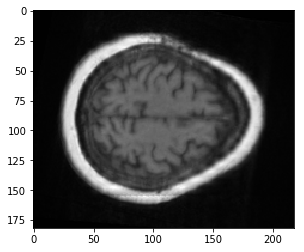

In [3]:
# Label Layer Mask of important regions
lab_pallidum_L = (lab_ar == 13).astype(int)
lab_pallidum_R = (lab_ar == 52).astype(int)
lab_brainstem = (lab_ar == 16).astype(int)
lab_thalamus_L = (lab_ar == 10).astype(int)
lab_thalamus_R = (lab_ar == 49).astype(int)
lab_comb = lab_pallidum_L + lab_pallidum_R + lab_brainstem + \
           lab_thalamus_L + lab_thalamus_R

# T1 images of important regions
T1_pallidum_L = np.multiply(T1_ar, lab_pallidum_L)
T1_pallidum_R = np.multiply(T1_ar, lab_pallidum_R)
T1_brainstem = np.multiply(T1_ar, lab_brainstem) 
T1_thalamus_L = np.multiply(T1_ar, lab_thalamus_L)
T1_thalamus_R = np.multiply(T1_ar, lab_thalamus_R)

# Slice the Brain
slize = 120

print(T1_img.header.get_xyzt_units(), lab_img.header.get_xyzt_units())
print(np.min(T1_ar[:, slize, :]), np.max(T1_ar[:, slize, :]))

f, ax = plt.subplots()
ax.imshow(T1_ar[ :, :, slize], cmap='gray')
#ax.imshow(T1_brainstem[ :, :, slize], cmap='gray')
plt.show()

In [4]:
def to_int(com):
    Y = com[0]
    X = com[1]
    return [int(X), int(Y)]


def create_frame(roi_com, boundary):
    frame = [roi_com[1]-boundary,
             roi_com[1]+boundary,
             roi_com[0]-boundary,
             roi_com[0]+boundary]
    return frame


def create_roi(lab, T1, pallidum_L_com, boundary, slize):
    frame = create_frame(pallidum_L_com, boundary)
    lab_roi = lab[frame[0]:frame[1],
                  frame[2]:frame[3]]
    T1_roi = T1[:, slize, :][frame[0]:frame[1],
                           frame[2]:frame[3]]
    return lab_roi, T1_roi

Number of Regions of Interest:  4


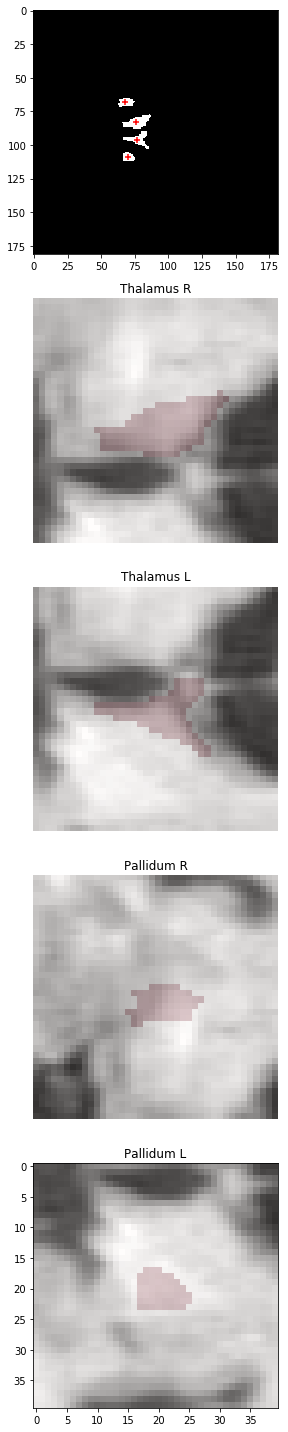

In [5]:

lab_pallidum_L_roi = lab_pallidum_L[:, slize, :]
lab_pallidum_R_roi = lab_pallidum_R[:, slize, :]
lab_brainstem_roi = lab_brainstem[:, slize, :]
lab_thalamus_L_roi = lab_thalamus_L[:, slize, :]
lab_thalamus_R_roi = lab_thalamus_R[:, slize, :]
T1_pallidum_L_roi = T1_pallidum_L[:, slize, :]
T1_pallidum_R_roi = T1_pallidum_R[:, slize, :]
T1_brainstem_roi = T1_brainstem[:, slize, :]
T1_thalamus_L_roi = T1_thalamus_L[:, slize, :]
T1_thalamus_R_roi = T1_thalamus_R[:, slize, :]

"""
lab_pallidum_L_roi = lab_pallidum_L[ :, :, slize]
lab_pallidum_R_roi = lab_pallidum_R[ :, :, slize]
lab_brainstem_roi = lab_brainstem[ :, :, slize]
lab_thalamus_L_roi = lab_thalamus_L[ :, :, slize]
lab_thalamus_R_roi = lab_thalamus_R[ :, :, slize]
T1_pallidum_L_roi = T1_pallidum_L[ :, :, slize]
T1_pallidum_R_roi = T1_pallidum_R[ :, :, slize]
T1_brainstem_roi = T1_brainstem[ :, :, slize]
T1_thalamus_L_roi = T1_thalamus_L[ :, :, slize]
T1_thalamus_R_roi = T1_thalamus_R[ :, :, slize]
"""
boundary = 20
num_of_roi = 0
if np.max(lab_pallidum_L_roi) != 0:
    pallidum_L_com = to_int(regionprops(lab_pallidum_L_roi)[0].centroid)
    lab_pallidum_L_roi, T1_pallidum_L_roi = create_roi(lab_pallidum_L_roi,
                                                       T1_ar,
                                                       pallidum_L_com,
                                                       boundary, slize)
    num_of_roi += 1
if np.max(lab_pallidum_R_roi) != 0:
    pallidum_R_com = to_int(regionprops(lab_pallidum_R_roi)[0].centroid)
    lab_pallidum_R_roi, T1_pallidum_R_roi = create_roi(lab_pallidum_R_roi,
                                                       T1_ar,
                                                       pallidum_R_com,
                                                       boundary, slize)
    num_of_roi += 1
if np.max(lab_brainstem_roi) != 0:
    brainstem_com = to_int(regionprops(lab_brainstem_roi)[0].centroid)
    lab_brainstem_roi, T1_brainstem_roi = create_roi(lab_brainstem_roi,
                                                     T1_ar,
                                                     brainstem_com,
                                                     boundary, slize)
    num_of_roi += 1
if np.max(lab_thalamus_L_roi) != 0:
    thalamus_L_com = to_int(regionprops(lab_thalamus_L_roi)[0].centroid)
    lab_thalamus_L_roi, T1_thalamus_L_roi = create_roi(lab_thalamus_L_roi,
                                                       T1_ar,
                                                       thalamus_L_com,
                                                       boundary, slize)
    num_of_roi += 1
if np.max(lab_thalamus_R_roi) != 0:
    thalamus_R_com = to_int(regionprops(lab_thalamus_R_roi)[0].centroid)
    lab_thalamus_R_roi, T1_thalamus_R_roi = create_roi(lab_thalamus_R_roi,
                                                       T1_ar,
                                                       thalamus_R_com,
                                                       boundary, slize)
    num_of_roi += 1
print('Number of Regions of Interest: ', num_of_roi)


fig, ax = plt.subplots(nrows=num_of_roi+1, ncols=1, figsize=(20, 20))
ax[0].imshow(lab_comb[:, slize, :], cmap='gray')
#ax[0].imshow(lab_comb[:, :, slize], cmap='gray')
if (num_of_roi > 0) and (np.max(lab_pallidum_L_roi) != 0):
    ax[0].scatter(pallidum_L_com[0], pallidum_L_com[1], marker='+', c='r')
    ax[num_of_roi].imshow(T1_pallidum_L_roi, cmap='gray')
    ax[num_of_roi].imshow(lab_pallidum_L_roi, cmap='Reds', alpha=0.2)
    ax[num_of_roi].set_title("Pallidum L")
    num_of_roi -= 1
if (num_of_roi > 0) and (np.max(lab_pallidum_R_roi) != 0):
    ax[0].scatter(pallidum_R_com[0], pallidum_R_com[1], marker='+', c='r')
    ax[num_of_roi].imshow(T1_pallidum_R_roi, cmap='gray')
    ax[num_of_roi].imshow(lab_pallidum_R_roi, cmap='Reds', alpha=0.2)
    ax[num_of_roi].set_title("Pallidum R")
    ax[num_of_roi].axis('off')
    num_of_roi -= 1
if (num_of_roi > 0) and (np.max(lab_brainstem_roi) != 0):
    ax[0].scatter(brainstem_com[0], brainstem_com[1], marker='+', c='r')
    ax[num_of_roi].imshow(T1_brainstem_roi, cmap='gray')
    ax[num_of_roi].imshow(lab_brainstem_roi, cmap='Reds', alpha=0.2)
    ax[num_of_roi].set_title("Brain Stem")
    ax[num_of_roi].axis('off')
    num_of_roi -= 1
if (num_of_roi > 0) and (np.max(lab_thalamus_L_roi) != 0):
    ax[0].scatter(thalamus_L_com[0], thalamus_L_com[1], marker='+', c='r')
    ax[num_of_roi].imshow(T1_thalamus_L_roi, cmap='gray')
    ax[num_of_roi].imshow(lab_thalamus_L_roi, cmap='Reds', alpha=0.2)
    ax[num_of_roi].axis('off')
    ax[num_of_roi].set_title("Thalamus L")
    num_of_roi -= 1
if (num_of_roi > 0) and (np.max(lab_thalamus_R_roi) != 0):
    ax[0].scatter(thalamus_R_com[0], thalamus_R_com[1], marker='+', c='r')
    ax[num_of_roi].imshow(T1_thalamus_R_roi, cmap='gray')
    ax[num_of_roi].imshow(lab_thalamus_R_roi, cmap='Reds', alpha=0.2)
    ax[num_of_roi].set_title("Thalamus R")
    ax[num_of_roi].axis('off')

fig.tight_layout()
plt.show()

## Watershed segmentation

In [13]:
def my_unit_circle(d, r):
    d = 40 #2*r + 1
    rx, ry = int(d/2), int(d/2)
    x, y = np.indices((d, d))
    circle = (np.abs(np.hypot(rx - x, ry - y)-r) < 0.5).astype(int)
    return circle

def watershed_seg(im_slize):
    mm = 'local'
    image = np.true_divide(im_slize, np.max(im_slize))
    denoised = rank.median(image, disk(3))
    if mm == 'gradient':
        markers = rank.gradient(denoised, disk(2)) < 5 #disk(5)
        #markers = np.zeros((len(im_slize), len(im_slize)), dtype=bool)
        #markers[20, 20] = 1; markers[2, 4] = 1; markers[35, 30] = 1; markers[35, 4] = 1; markers[2, 36] = 1;
        markers = ndi.label(markers)[0]
    elif mm == 'circle':
        circle = my_unit_circle(25, 10)
        markers = np.add(np.zeros(image.shape), circle)
        markers[20, 20] = 1
        markers = ndi.label(markers)[0]
    elif mm == 'local':
        local_maxima = feature.peak_local_max(image, indices=False,
                                              footprint=np.ones((3, 3)))
        markers = ndi.label(local_maxima)[0]
    elif mm == 'test':
        markers = np.zeros(im_slize.shape, dtype=np.int)
        markers[im_slize, y.astype(np.int)] = np.arange(len(im_slize)) + 1
        markers = morphology.dilation(markers, morphology.disk(7))
    # local gradient (disk(2) is used to keep edges thin)
    gradient = rank.gradient(denoised, disk(1))
    # process the watershed
    labels = watershed(gradient, markers)
    return image, gradient, markers, labels

In [18]:
#image, gradient, markers, labels = watershed_seg(T1_pallidum_L_roi); roi_mask = lab_pallidum_L_roi; filename = 'WS_pallidum_L.png'
#image, gradient, markers, labels = watershed_seg(T1_pallidum_R_roi); roi_mask = lab_pallidum_R_roi; filename = 'WS_pallidum_R.png'
#image, gradient, markers, labels = watershed_seg(T1_brainstem_roi); roi_mask = lab_brainstem_roi; filename = 'WS_brainstem.png'
image, gradient, markers, labels = watershed_seg(T1_thalamus_L_roi); roi_mask = lab_thalamus_L_roi; filename = 'WS_thalamus_L.png'
#image, gradient, markers, labels = watershed_seg(T1_thalamus_R_roi); roi_mask = lab_thalamus_R_roi; filename = 'WS_thalamus_R.png'

#labels = (labels == labels[boundary, boundary]).astype(int)
#print(roi_mask)
#print(np.min(labels), np.max(labels))
#label_int = np.unique(np.multiply(labels, roi_mask))
#print(label_int)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral,
             interpolation='nearest')
ax[1].imshow(roi_mask, cmap='Reds', alpha=0.4)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral,
             interpolation='nearest', alpha=.6)
ax[3].imshow(roi_mask, cmap='Reds', alpha=0.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.savefig('../Latex/images/' + filename)
plt.clf()
#plt.show()

/home/chrbecker/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<Figure size 576x576 with 0 Axes>

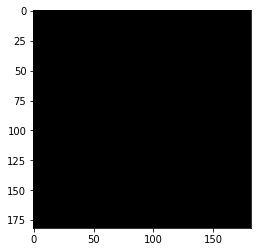

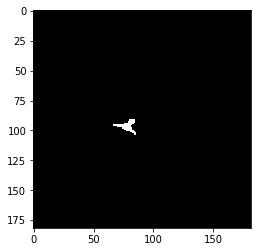

In [146]:
# Generate the markers as local maxima of the
# distance to the background
lab_ar_xsec = lab_thalamus_L[:, 120, :]
T1_ar_xsec = T1_thalamus_L[:, 120, :]
distance = ndi.distance_transform_edt(T1_ar_xsec)
local_maxi = peak_local_max(distance, indices=False,
                            #footprint=np.ones((3, 3)),
                            labels=T1_ar_xsec)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=lab_ar_xsec)

diffe = np.subtract(labels, lab_ar_xsec)
#print(np.where(diffe != 0))
#print(diffe[100, :])
f, ax = plt.subplots()
ax.imshow(diffe, cmap='gray')
plt.show()

f, ax = plt.subplots()
ax.imshow(lab_ar_xsec, cmap='gray')
plt.show()

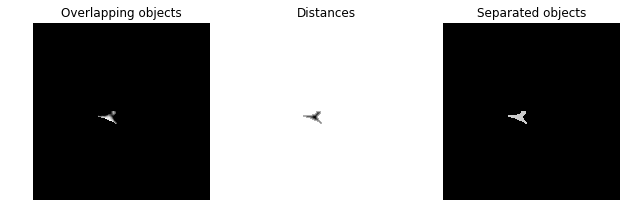

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(T1_ar_xsec, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


## Histograms of Regions

In [10]:
bins = 256
indx = np.where(T1_pallidum_L != 0)
plt.hist(T1_pallidum_L[indx], bins=bins, histtype='step',
         label='Pallidum L')
indx = np.where(T1_pallidum_R != 0)
plt.hist(T1_pallidum_R[indx], bins=bins, histtype='step',
         label='Pallidum R')
plt.xlabel('Intensity')
plt.ylabel('Number of Voxels')
plt.legend(loc=2)
plt.savefig('Hist_Pallidum.png')
#plt.show()
plt.clf()

indx = np.where(T1_brainstem != 0)
plt.hist(T1_brainstem[indx], bins=bins, histtype='step',
         label='Brain Stem')
plt.xlabel('Intensity')
plt.ylabel('Number of Voxels')
plt.savefig('Hist_BrainStem.png')
#plt.show()
plt.clf()


indx = np.where(T1_thalamus_L != 0)
plt.hist(T1_thalamus_L[indx], bins=bins, histtype='step',
         label='Thalamus L')
indx = np.where(T1_thalamus_R != 0)
plt.hist(T1_thalamus_R[indx], bins=bins, histtype='step',
         label='Thalamus R')
plt.xlabel('Intensity')
plt.ylabel('Number of Voxels')
plt.legend(loc=2)
plt.savefig('Hist_Thalamus.png')
#plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

Why do the max(x-values) vary between 260, 270, 280? Shouldn't it be 255